In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!pip install scikit-plot

In [3]:
from scikitplot.metrics import plot_roc

In [4]:
from seaborn import heatmap
from sklearn.metrics import classification_report, plot_confusion_matrix, roc_curve, auc, confusion_matrix, accuracy_score
from matplotlib import pyplot as plt

def plot_roc_curve(fp_r, tp_r):
    roc_auc = auc(fp_r, tp_r)
    plt.plot(fp_r, tp_r, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

def plot_model(m, X, y, three=False):
  y_pred = []
  y_prob = []
  for i in range(len(y)):
    X_test = X[i, :].reshape(1, -1)
    X_train = np.delete(X, i, axis=0)
    y_test = y[i]
    y_train = np.delete(y, i)
    m.fit(X_train, y_train)
    y_pred.append(m.predict(X_test))
    y_prob.append(m.predict_proba(X_test))
  y_prob = np.squeeze(y_prob)
  y_pred = np.squeeze(y_pred)
  print('Accuracy score: ' + str(accuracy_score(y, y_pred)))
  heatmap(confusion_matrix(y, y_pred), annot=True, fmt= 'd', cmap=plt.cm.Blues)
  plt.show()
  heatmap(confusion_matrix(y, y_pred, normalize='true'), annot=True, cmap=plt.cm.Blues)
  plt.show()
  plot_roc(y, y_prob)
  plt.show()


In [5]:
import os
import pandas as pd

root = './gdrive/My Drive/thesis'
df = pd.read_csv(os.path.join(root, 'Database completo .csv'), header=0, index_col=0, delimiter=';')
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
df = df.loc[result.index.values]

df[df.columns[-1]].value_counts()

MCI        130
DEMENZA     62
NORMALI     30
MCI          1
Name: DGN1, dtype: int64

In [6]:
from sklearn.model_selection import LeaveOneOut, GridSearchCV, train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np

def label(s):
    if s == 'NORMALI':
        return 0
    else:
      return 1

X = df.iloc[:, 3:-1].to_numpy()
print(X.shape)
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

(223, 18)
[1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0]


Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 11886 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 15882 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 19422 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  3.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 2636 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 6636 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:   56.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 19740 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 28540 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:  3.2min finished


LOOCV score = 0.8654708520179372
Accuracy score: 0.8654708520179372


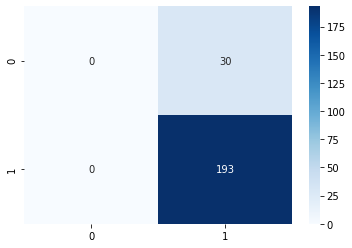

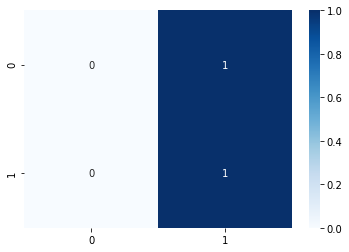

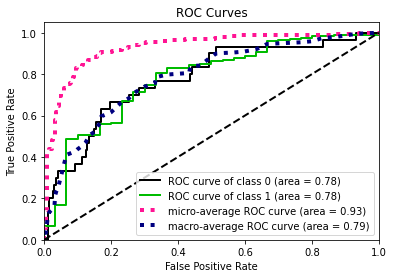

LOOCV score = 0.8654708520179372
Accuracy score: 0.8654708520179372


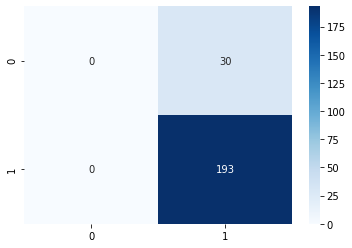

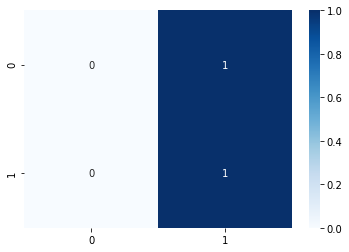

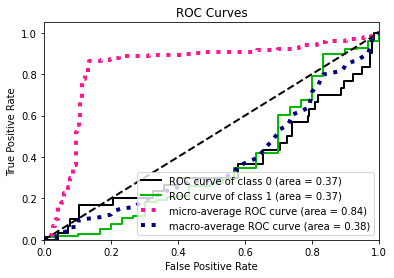

LOOCV score = 0.8699551569506726
Accuracy score: 0.8699551569506726


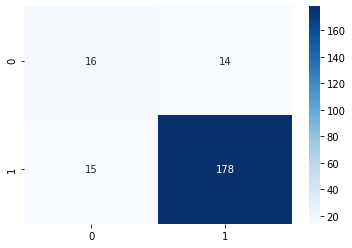

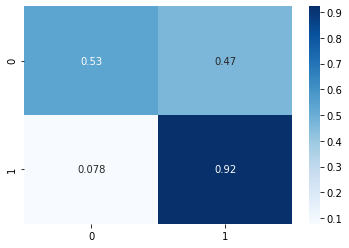

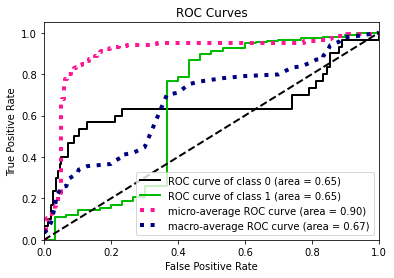

In [7]:


param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.789 (0.408)
Accuracy score: 0.7892376681614349


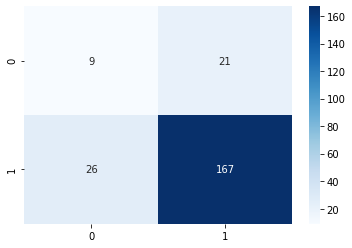

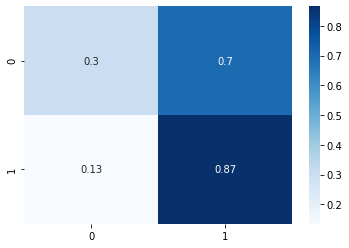

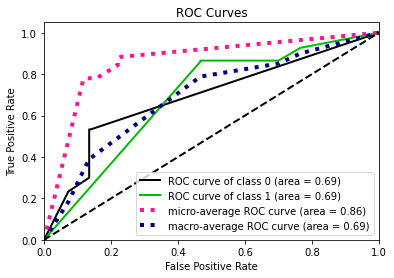

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

Fitting 223 folds for each of 90 candidates, totalling 20070 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:   48.9s
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 16412 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 19528 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 20070 out of 20070 | elapsed:  4.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 30 candidates, totalling 6690 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 6690 out of 6690 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 223 folds for each of 150 candidates, totalling 33450 fits


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 14300 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 19500 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 25500 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 32300 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 33450 out of 33450 | elapsed:  7.2min finished


LOOCV score = 0.7802690582959642
Accuracy score: 0.7802690582959642


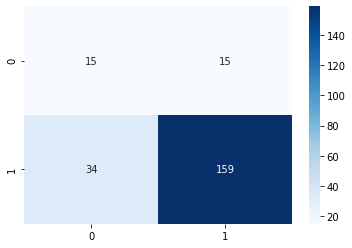

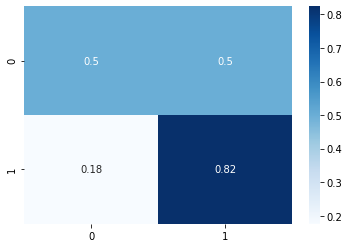

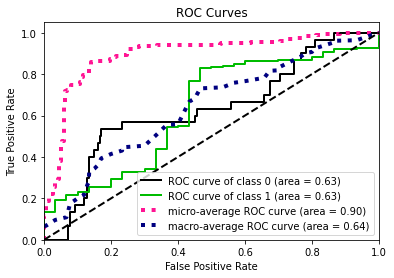

LOOCV score = 0.8609865470852018
Accuracy score: 0.8609865470852018


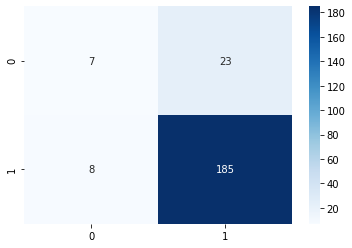

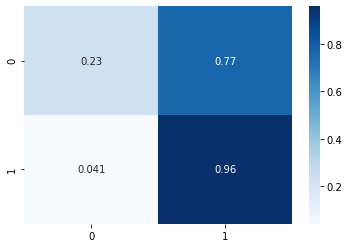

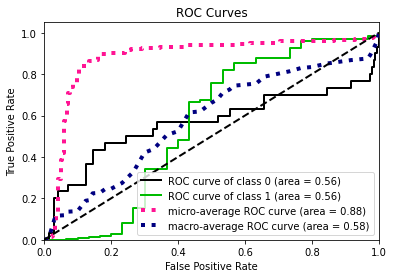

LOOCV score = 0.7668161434977578
Accuracy score: 0.7668161434977578


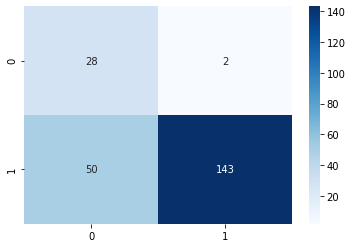

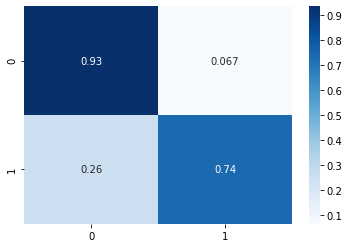

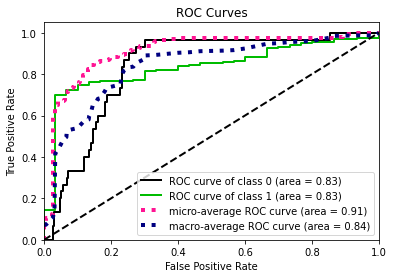

In [9]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

Accuracy: 0.807 (0.395)
Accuracy score: 0.8071748878923767


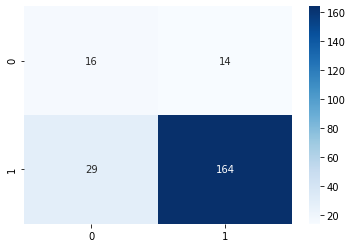

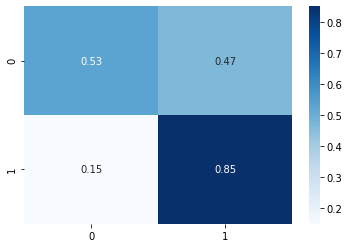

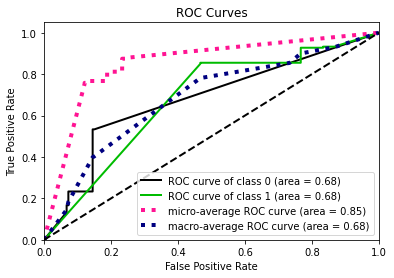

In [10]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [ ]:
df = pd.read_csv(os.path.join(root, 'bilanciato_abbate_3.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

[1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Fitting 386 folds for each of 90 candidates, totalling 34740 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 3500 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 6300 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 9900 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 11950 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 16058 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 17438 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 21648 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 22598 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 25334 tasks      | elapsed: 16.8min
[Parallel(n_jobs=-1)]: Done 27660 tasks      | elapsed: 21.1min


In [ ]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [ ]:
result = pd.read_csv(os.path.join(root, 'miei_result.csv'), header=0, index_col=0)
X = result.to_numpy()


X_s = StandardScaler().fit_transform(X)
print(X.shape)
y = df.loc[result.index.values, 'DGN1'].to_numpy()
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight='balanced', probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  print('model : {}'.format(m_best))
  plot_model(m_best, X_s, y_3)

In [ ]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(class_weight='balanced', random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)

In [ ]:
df = pd.read_csv(os.path.join(root, 'bilanciato_miei_3.csv'), header=0, index_col=0)
X = df.iloc[:, :-1].to_numpy()
X_s = StandardScaler().fit_transform(X)
y = df.iloc[:,-1].to_numpy().astype(str)
unique = np.unique(y)
mapping = {}
for i in range(len(unique)):
     mapping[i] = np.where(y == unique[i])[0]
for idx in mapping[2]:
    y[idx] = unique[1]

y_3 = np.array(list(map(label, y)))
print(y_3)

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
      'coef0': np.linspace(-10, 10, 5),
      'degree': [2, 3, 4]}
svm_poly = GridSearchCV(SVC(kernel='poly', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
svm_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
rbf_poly = GridSearchCV(SVC(kernel='rbf', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
rbf_poly.fit(X_s, y_3)
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'coef0': np.linspace(-10, 10, 5)}
sigm_poly = GridSearchCV(SVC(kernel='sigmoid', class_weight=None, probability=True), param_grid,
                        cv=LeaveOneOut(), refit=True, n_jobs=-1, verbose=1)
sigm_poly.fit(X_s, y_3)
names = ['poly', 'rbf', 'sigm']
for m in [svm_poly, rbf_poly, sigm_poly]:
  m_best = m.best_estimator_
  print('LOOCV score = {}'.format(m.best_score_))
  plot_model(m_best, X_s, y_3)

In [ ]:
cv = LeaveOneOut()
decision_t = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(decision_t, X, y_3, cv=cv, n_jobs=-1) 
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
plot_model(decision_t, X, y_3)